In [144]:
import pandas as pd
import numpy as np
import sklearn 
import time 

In [179]:
df = pd.read_csv('glassdoor_scrape.csv',index_col=0)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Tactical Data Link (TDL) Analyst,$53K-$95K (Glassdoor Est.),Overview:\n\nOasis Systems has an exciting opp...,3.8,Oasis Systems LLC\n3.8,"Hampton, VA",-1,1001 to 5000 Employees,1997,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1
1,Data Analyst,$33K-$57K (Glassdoor Est.),Job Details\nDescription\nMetroNet has an imme...,4.5,MetroNet\n4.5,"Evansville, IN",-1,1001 to 5000 Employees,2005,Company - Private,"Cable, Internet & Telephone Providers",Telecommunications,Unknown / Non-Applicable,-1
2,Senior Data Analyst,-1,Now Hiring a Senior Data Analyst\n\nInterested...,4.4,Applied Information Sciences\n4.4,Maryland,-1,501 to 1000 Employees,1982,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1
3,"Senior, Measurement Data Analyst",$65K-$112K (Glassdoor Est.),Position Summary\nPerforms data analysis to en...,3.5,Enable Midstream Partners\n3.5,"Oklahoma City, OK",-1,201 to 500 Employees,-1,Company - Public,Oil & Gas Exploration & Production,"Oil, Gas, Energy & Utilities",$10 to $25 million (USD),-1
4,Data Management Analyst,-1,What You Will Do:\nSupports the Member Contact...,-1.0,Security Service FCU,"San Antonio, TX",-1,-1,-1,-1,-1,-1,-1,-1


In [180]:
#removing companies without est. salary
df.loc[df['Salary Estimate'] == '-1', 'Salary Estimate'] = None
df.dropna(axis = 0,inplace = True)

#finding the average estimated salary for the lisitings
df['Salary Estimate'] = df['Salary Estimate'].map(lambda x: np.mean([int(z) for z in ''.join([y for y in list(x[:-16]) if y not in ['$','K']]).split('-')]) * 1000)

#Extracting the State Name from the company location
df['Location'] = df['Location'].map(lambda x: x[-2:])

#fix the company name 
df['Company Name'] = df.apply(lambda x: x['Company Name'][:-4] if x['Rating'] > 0 else x['Company Name'] , axis =1)

#Age of company 
df['Age'] = df['Founded'].map(lambda x: time.localtime().tm_year - x)
df.drop('Founded',axis =1 ,inplace = True)

#Highlight important words in Job Description
imp_terms = ['python','analysis','data','models','deploy',
             'train','database','SQL','AWS','cloud','machine',
             'learning','cleaning','training','insights','spark','hadoop','masters','bachelors']

df['Description_terms'] = df['Job Description'].map(lambda x: ','.join(list(set([y.lower() for y in x.split() if y.lower() in imp_terms]))))
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Age,Description_terms
0,Tactical Data Link (TDL) Analyst,74000.0,Overview:\n\nOasis Systems has an exciting opp...,3.8,Oasis Systems LLC,VA,-1,1001 to 5000 Employees,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,23,"analysis,data"
1,Data Analyst,45000.0,Job Details\nDescription\nMetroNet has an imme...,4.5,MetroNet,IN,-1,1001 to 5000 Employees,Company - Private,"Cable, Internet & Telephone Providers",Telecommunications,Unknown / Non-Applicable,-1,15,"analysis,data"
3,"Senior, Measurement Data Analyst",88500.0,Position Summary\nPerforms data analysis to en...,3.5,Enable Midstream Partners,OK,-1,201 to 500 Employees,Company - Public,Oil & Gas Exploration & Production,"Oil, Gas, Energy & Utilities",$10 to $25 million (USD),-1,2021,"analysis,data,train"
5,Lead IT Analyst - Data Governance,64000.0,"About JLG, an Oshkosh company\n\nJLG began in ...",4.2,Oshkosh Corporation,MD,-1,10000+ Employees,Company - Public,Transportation Equipment Manufacturing,Manufacturing,$5 to $10 billion (USD),-1,103,"training,data"
6,Data Analyst,61000.0,We are empowering our clients with actionable ...,3.4,Social Solutions,TX,-1,201 to 500 Employees,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),-1,20,"insights,data,python,learning,analysis"


<BarContainer object of 12 artists>

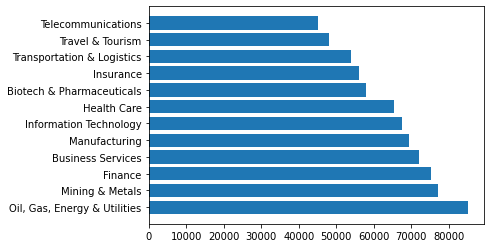

In [195]:
industry_rates = df.groupby('Sector')['Salary Estimate'].mean().sort_values(ascending = False)

plt.barh(y=industry_rates.index, width=industry_rates.values)

In [182]:
df.to_csv('glassdoor_cleaned.csv')